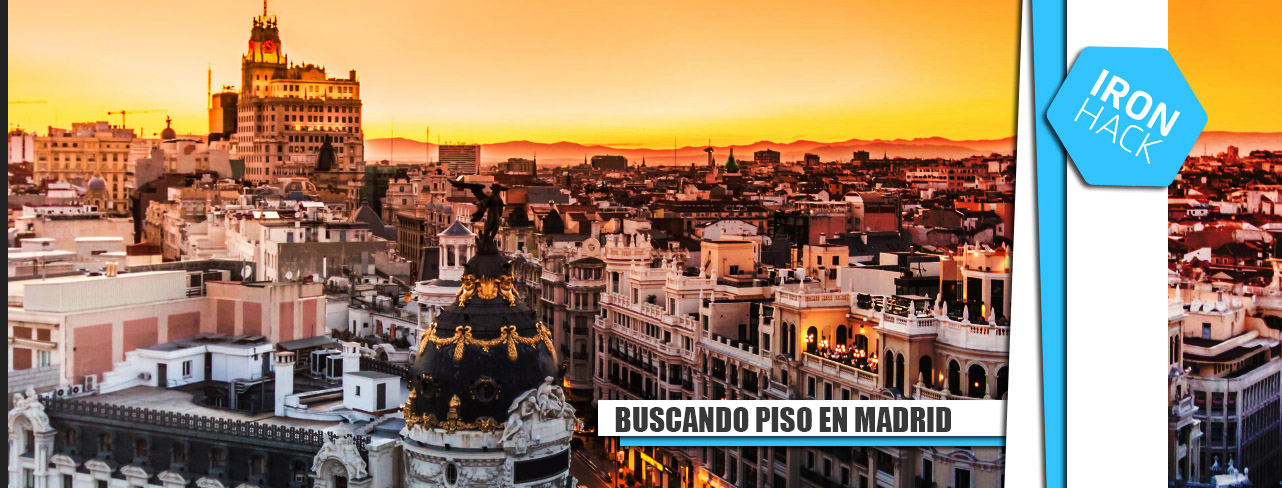

In [1]:
import sys
sys.path.append("../")

In [2]:
import src.tratamiento_datos as td

In [2]:
from pymongo import MongoClient
client = MongoClient("localhost:27017")
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [3]:
db = client.get_database("ironhack")

In [4]:
from pymongo import GEOSPHERE

In [5]:
import numpy as np
import requests
import json
from dotenv import load_dotenv
import os
import pandas as pd
from pandas.core.common import flatten
from functools import reduce
import operator
load_dotenv()

True

In [29]:
coordenadas

,coord_erepublik,coord_bar,coord_colegio,coord_estacion,coord_starbucks,coord_veterinario,posibles_emplazamientos
0,"[40.43459348031462, -3.6937967777455025]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4339132484691, -3.69240477137425]"
1,"[40.43459348031462, -3.6937967777455025]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4338185224, -3.6912699659]","[40.43392013518577, -3.6922620373409174]"
2,"[40.43459348031462, -3.6937967777455025]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4338185224, -3.6912699659]","[40.4337772021, -3.6921263701]","[40.43392013518577, -3.6922620373409174]"
3,"[40.43459348031462, -3.6937967777455025]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4338185224, -3.6912699659]","[40.4338185224, -3.6912699659]","[40.43392702190244, -3.692119303307584]"
4,"[40.43459348031462, -3.6937967777455025]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4337772021, -3.6921263701]","[40.4338185224, -3.6912699659]","[40.4351629991, -3.6917808228]","[40.434151101352434, -3.6922044461242507]"


In [7]:
tok1='YSS3V41QKFXVDXT4GTN4Z5SJE4VP3O4ADYABQN4OQ5LWAPNM'
tok2='WMQKJO1F3X2L0ZVLWJOD4YVBTXU0FRVCXWXLE5OLRXAX2C1W'

In [41]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.4339132484691, -3.69240477137425',
radius = 0,
query='Starbucks',
limit=50
)

resp = requests.get(url= url, params = params).json()

data = resp.get("response").get("groups")[0].get("items")

def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

starbucks_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    starbucks_madrid.append(paralista)

starbucks_mad = pd.DataFrame(starbucks_madrid)

starbucks_mad['tipo'] = 'Starbucks'

starbucks_mad.shape

(45, 4)

In [38]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.4339132484691, -3.69240477137425',
radius = 500,
query='school',
limit=50
)

resp = requests.get(url= url, params = params).json()

data = resp.get("response").get("groups")[0].get("items")

def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

colegios_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    colegios_madrid.append(paralista)

colegios_mad = pd.DataFrame(colegios_madrid)

colegios_mad['tipo'] = 'Colegios'

colegios_mad.shape

(11, 4)

In [39]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.4339132484691, -3.69240477137425',
radius = 500,
query='bar',
limit=50
)

resp = requests.get(url= url, params = params).json()

data = resp.get("response").get("groups")[0].get("items")

def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

bar_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    bar_madrid.append(paralista)

bar_mad = pd.DataFrame(bar_madrid)

bar_mad['tipo'] = 'Bar'

bar_mad.shape

(39, 4)

In [40]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.4339132484691, -3.69240477137425',
radius = 500,
query='bus station',
limit=50
)

resp = requests.get(url= url, params = params).json()

data = resp.get("response").get("groups")[0].get("items")

def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

estaciones_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    estaciones_madrid.append(paralista)

estaciones_mad = pd.DataFrame(estaciones_madrid)

estaciones_mad['tipo'] = 'Estaciones'

estaciones_mad.shape

(4, 4)

In [25]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.4339132484691, -3.69240477137425',
radius = 500,
query='veterinarian',
limit=50
)

resp = requests.get(url= url, params = params).json()

data = resp.get("response").get("groups")[0].get("items")

def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

dobby_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    dobby_madrid.append(paralista)

dobby_mad = pd.DataFrame(dobby_madrid)

dobby_mad['tipo'] = 'Peluquería_canina'

dobby_mad.head()

,name,latitud,longitud,tipo
0,Clinica Veterinaria Castellana,40.436664,-3.69229,Peluquería_canina


In [54]:
para_mapa = pd.concat([starbucks_mad, colegios_mad, bar_mad, estaciones_mad, dobby_mad], sort = False)

In [64]:
para_mapa.sample(5)

,name,latitud,longitud,tipo
10,Richelieu,40.432891,-3.694498,Bar
5,I.E.S. Fortuny,40.433772,-3.689956,Colegios
21,Panaria,40.432972,-3.698017,Bar
15,Lateral,40.433648,-3.687629,Bar
14,Rio Tormes,40.437725,-3.692917,Bar


In [66]:
colegios = para_mapa['tipo'] == 'Colegios'
para_mapa[colegios]

,name,latitud,longitud,tipo
0,British Council Madrid Young Leaners,40.435136,-3.693705,Colegios
1,Colegio San Diego y San Vicente,40.432811,-3.694693,Colegios
2,Colegio Hermanos Maristas Chamberí,40.433740,-3.695396,Colegios
3,FAPA Giner de los Ríos,40.434581,-3.696783,Colegios
4,Instituto Internacional en España,40.434130,-3.691154,Colegios
5,I.E.S. Fortuny,40.433772,-3.689956,Colegios
6,Colegio Maria Inmaculada,40.434260,-3.695535,Colegios
7,Goethe-Institut Madrid,40.429529,-3.691362,Colegios
8,IE Business School MM2,40.437668,-3.689670,Colegios
9,Yowork,40.434827,-3.692270,Colegios
